# Simple Linear Regression Using Statsmodels

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
%matplotlib inline

### Loading the dataset as dataframe and printing it

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Machine-Learning\\Lesson-2-Supervised-Learning\\SimpleLinearRegression\\1.01. Simple linear regression.csv")
print(df)

     SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
5   1670  2.91
6   1764  3.00
7   1764  3.00
8   1792  3.01
9   1850  3.01
10  1735  3.02
11  1775  3.07
12  1735  3.08
13  1712  3.08
14  1773  3.12
15  1872  3.17
16  1755  3.17
17  1674  3.17
18  1842  3.17
19  1786  3.19
20  1761  3.19
21  1722  3.19
22  1663  3.20
23  1687  3.21
24  1974  3.24
25  1826  3.28
26  1787  3.28
27  1821  3.28
28  2020  3.28
29  1794  3.28
..   ...   ...
54  1879  3.44
55  1887  3.47
56  1730  3.47
57  1953  3.47
58  1781  3.47
59  1891  3.48
60  1964  3.49
61  1808  3.49
62  1893  3.50
63  2041  3.51
64  1893  3.51
65  1832  3.52
66  1850  3.52
67  1934  3.54
68  1861  3.58
69  1931  3.58
70  1933  3.59
71  1778  3.59
72  1975  3.60
73  1934  3.60
74  2021  3.61
75  2015  3.62
76  1997  3.64
77  2020  3.65
78  1843  3.71
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]


In [3]:
type(df)

pandas.core.frame.DataFrame

### Let's check for the missing values 

In [4]:
df.isnull().any()

SAT    False
GPA    False
dtype: bool

### Seems there are no missing values

In [5]:
# useful information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


### Let's Check the descriptive statistics of this two columns

In [6]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Creating first regression

### Let's define the dependent and independent variables

**we have simple regression equation as follows,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;y = b0 + b1 * x1 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;y is dependent variable, here it is GPA<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b0 is y-intercept<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b1 is slope / regression coefficient<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;x1 is independent variable, here it is SAT**


In [7]:
# dependent variable
y = df['GPA']  
# independent variable
x1 = df['SAT']   

### Let's Explore the data

#### we will plot a scatter plot

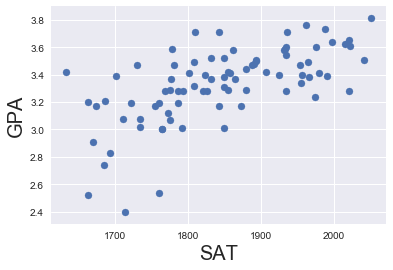

In [8]:
plt.scatter(x1,y)   

#first variable indicates x-axis and second variable indicated y-axis

#naming the axes
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)

#showing the plot
plt.show()

### Fitting Regression

#### First we will add a constant ie., a new column of length equal to that of x1 (consisting 1's only)
we are doing this because we have x1 associated with b1 but there nothing associated with b0 to write simple linear regression equation as y = $b'$ * x 



In [9]:
x0 = sm.add_constant(x1)
x0

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
5,1.0,1670
6,1.0,1764
7,1.0,1764
8,1.0,1792
9,1.0,1850


In [10]:
type(x0)

pandas.core.frame.DataFrame

#### x0 became dataframe consisting of column of 1's and x1

#### Now let's fit the model, according to the OLS (Ordinary Least Squares) to the y (dependent variable) and x1(independent variable) including the column of 1's.

In [11]:
regression = sm.OLS(y,x0).fit()

#### Let's check the summary of this regression fit

In [12]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           7.20e-11
Time:                        12:46:28   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the above summary table

#### Regression equation we got is as follows:
**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;y = 0.2750 + 0.0017 * x1 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b0 = 0.2750 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b1 = 0.0017<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ie.,GPA = 0.2750 + 0.0017 * SAT
<br><br>
Here, the hypotheis for F-statistic is b0 = b1 = 0<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; p-value for this F-statistic = 7.20e-11 (approx. = 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; p-value < alpha (0.05 ie., 5% level of significance), we reject this hypothesis.
<br><br>
Here, the hypothesis h1 for t-statistic is b0 = 0 for coeff. and the hypothesis h2 for t-statistic is b1 = 0 for SAT<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; p-value for h1 = 0.503<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; p-value > alpha (0.05 ie., 5% level of significance), we accept this hypothesis hence constant/y-intercept is insignificant.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; p-value for h2 = 0<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; p-value < alpha (0.05 ie., 5% level of significance), we reject this hypothesis hence x1 is significant.
<br><br>
Std error ie., standard error shows accuracy of prediction of each variable, lower the std error greater will be accuracy.<br><br><br>
R-square is coefficient of determination which indicates the amount of variation in y explained by the variables. It tells about goodness of fit.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;R-squared = SSR (Explained variability) / SST (Total Variability)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here, R-sq = 0.406 which is not much hence we can say variable x1 and y-intercept do not explain much variation in y<br><br>
Adj. R-square indicates the amount of variation in y explained by the significant variables only<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here, Adj R-sq = 0.399 which is not much hence we can say variable x1 do not explain much variation in y<br><br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dependent variable is GPA<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Model used is OLS which finds line that minimises the SSE ie., sum of squared error<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It uses gradient descent to minimize the errors<br><br><br>**

### Plotting best fit line or regression line

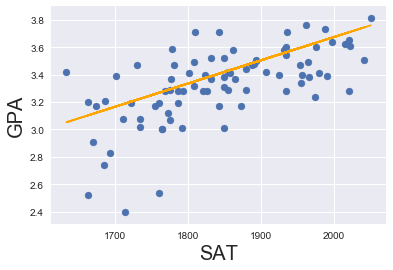

In [13]:
# create a scatter plot
plt.scatter(x1,y)

#naming axes
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)

#defining regression equation
y_hat = 0.275 + 0.0017*x1    #predicted dependent variable                 

#plotting line
fig = plt.plot(x1, y_hat, c = "orange", label = "regression line")

#showing the plot
plt.show()

# Predict for SAT = 1250

In [14]:
y_hat_1250 = 0.275 * (1250)    # note that we have removed b0 because it was insignificant.
y_hat_1250                 

# GPA = 343.75 for SAT = 1250

343.75

# Done!